In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Read the csv file

In [3]:
df = pd.read_csv('/home/joaolavinas/Documents/archive/diabetes.csv')

## Data information and data visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(f'Number of features is: {len(df.keys())}\n')
print(f'Dataset size is: {df.shape}\n')
print(f'List of features is: {df.keys()}')

Number of features is: 9

Dataset size is: (768, 9)

List of features is: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- All the features are numeric, allowing the calculation of mean, std, min, max, percintils and median for each one of the features.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The main propose of this work is calculate the outcome of being positive or negative for diabetes. Therefore, it is necessary know if each feature correlates with the 'outcome';
- Before this expect, the data needs to pass through a cleaning, such as fill the 'NaN' values, remove outliers, if needed, and so one. 

## Data preprocessing

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- None of the features have missing values or 'NaN' values.

In [9]:
#measure the number of duplicated values
print(f"{df.duplicated().value_counts()}")

False    768
Name: count, dtype: int64


- There aren't duplicated values.

### Outliers

- The outliers have a negative impact in data prediction because skew the results of any hypothesis test if they are inaccurate.

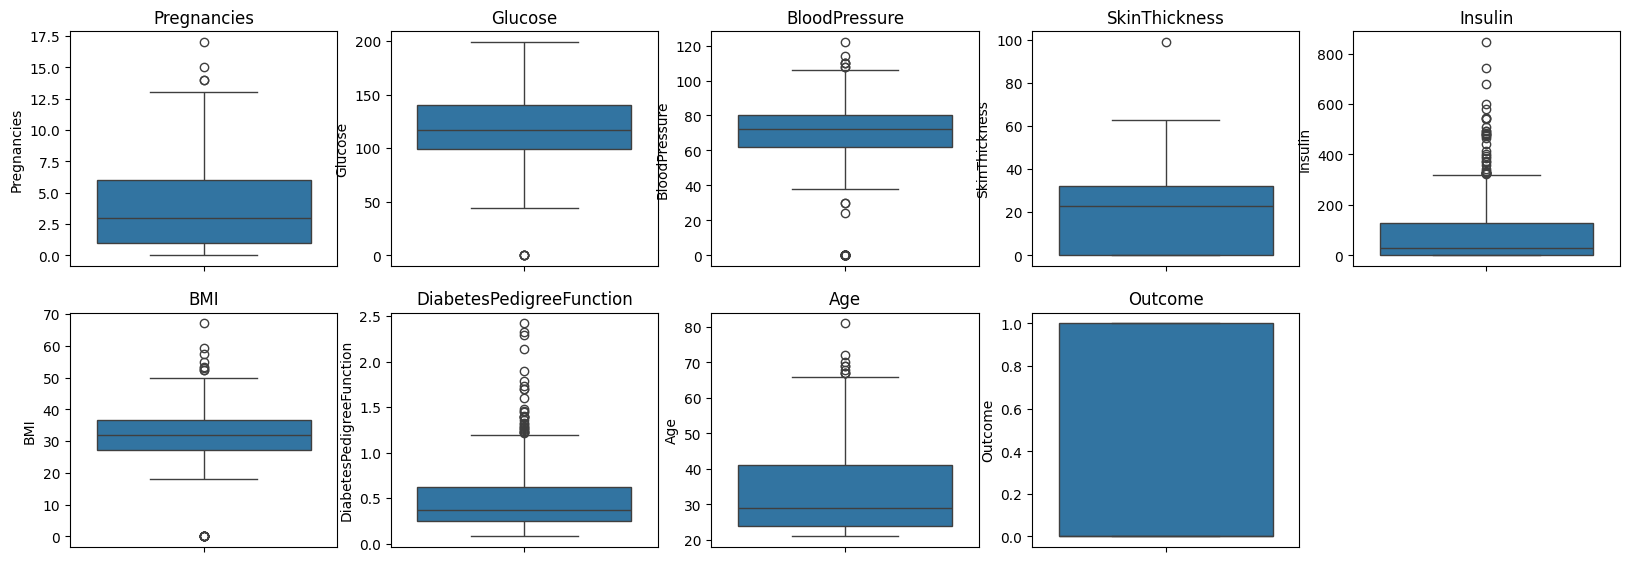

In [10]:
plt.figure(figsize=(20, 14))

for i in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(i)+1)
    sb.boxplot(data=df[i])
    plt.title(i)
plt.show()

- As it can tell, the 'Insulin' has high number of outliers;
- The 'removal' method adopted was z-score value, where the outliers were replaced by the median, avoiding decreasing the dataset size. 

In [11]:
import numpy as np
from scipy import stats

for i in df.keys():
    z = np.abs(stats.zscore(df[i]))

    df.loc[z > 3, i] = df[i].median() #usualy a z-score greater than 3 is considered an outlier

    df.loc[z < -3, i] = df[i].median() #usualy a z-score less than 3 is considered an outlier

/tmp/ipykernel_3618/2015916357.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z > 3, i] = df[i].median() #usualy a z-score greater than 3 is considered an outlier


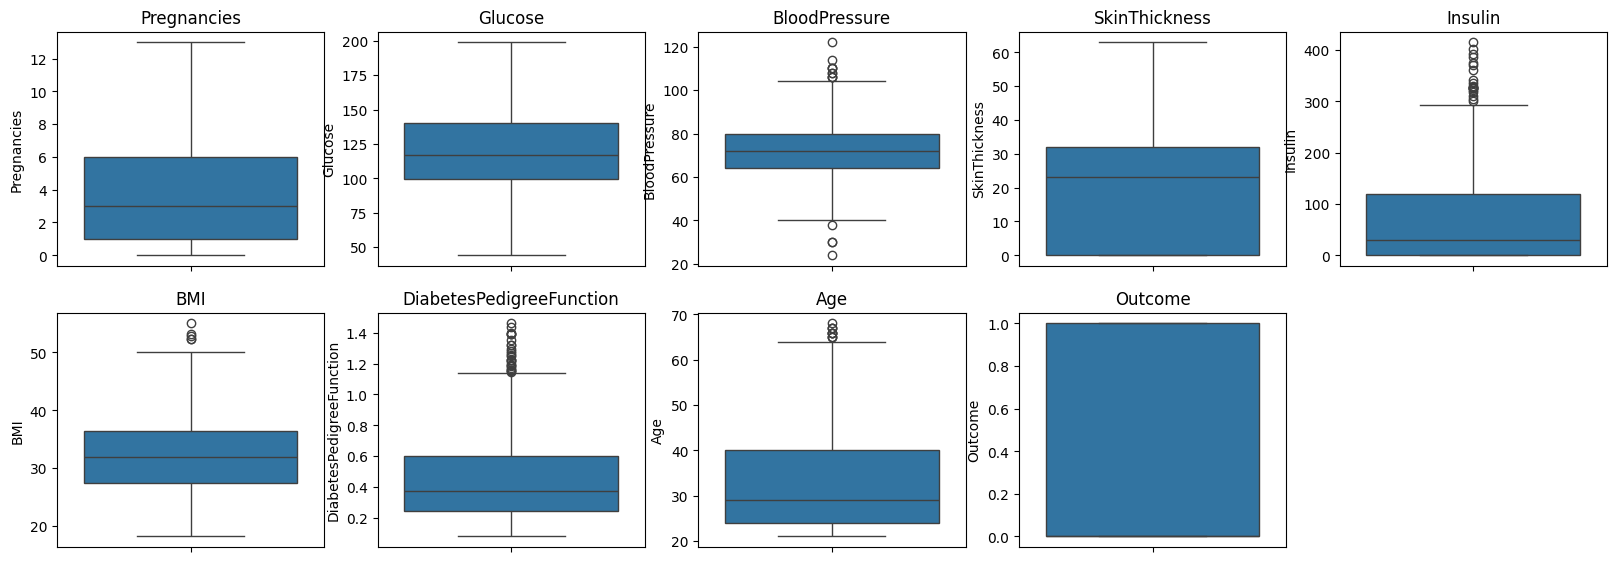

In [12]:
plt.figure(figsize=(20, 14))

for i in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(i)+1)
    sb.boxplot(data=df[i])
    plt.title(i)
plt.show()

### Heatmap

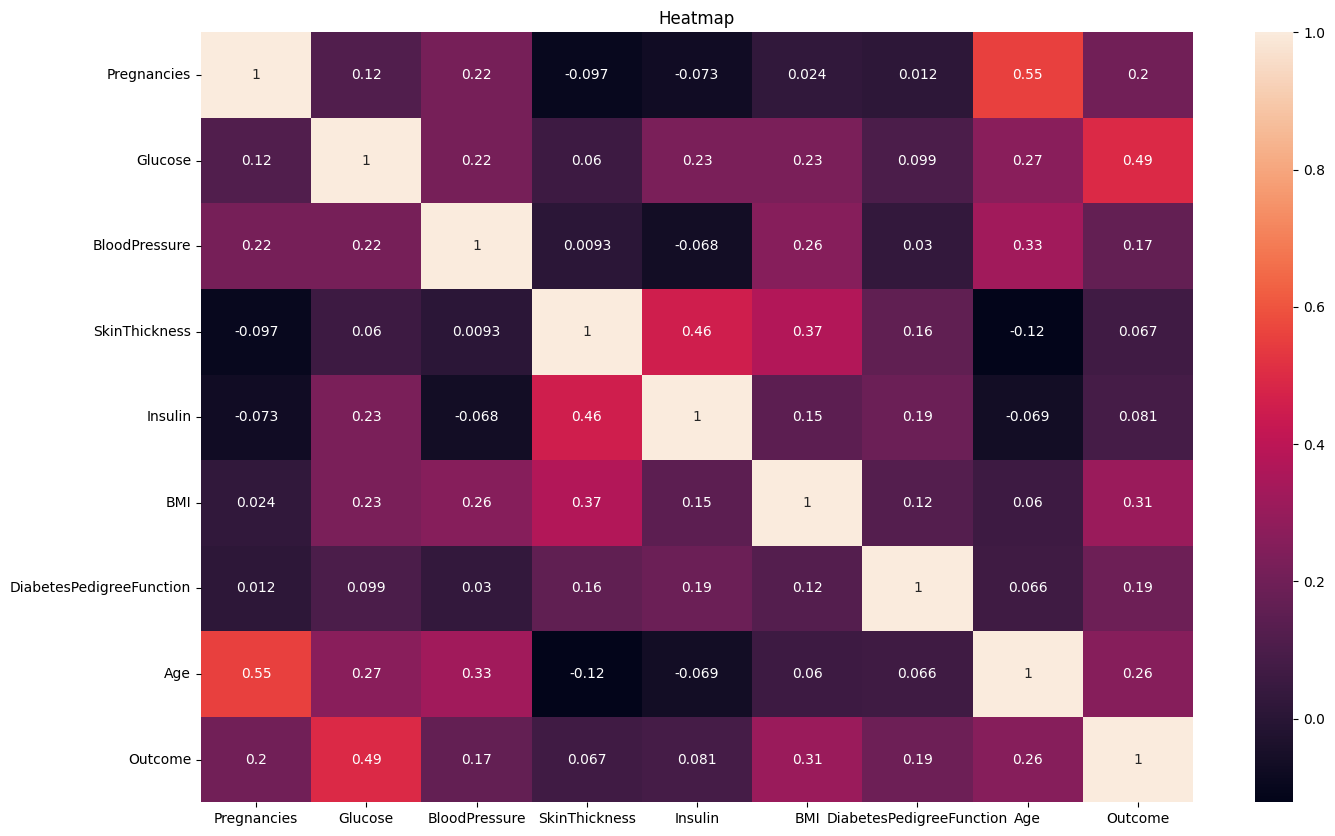

In [13]:
import matplotlib.pyplot as plt

#kendall' method
table = df.corr() 

plt.figure(figsize=(16,10))
sb.heatmap(table, annot=True)
plt.title('Heatmap')
plt.show()

- Some features have not a high correlation with 'outcome'. The Kendall's method is not the only implemented;
- Due to lack of features, were not removed from the dataset.

## Machine Learning

- The problem is a classification taks, so the machine learning and deep learning models selected should be able to classify if the person has or not diabetes;
- The first step taiken was split the dataset in train and test. 

In [15]:
# dataset
x = df.drop(columns=['Outcome']) #features
y = df['Outcome'] #labels

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score

x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size=0.25 , random_state=0)

print(f"X_train size:{x_train.shape} and X_test size:{x_test.shape}")

X_train size:(576, 8) and X_test size:(192, 8)


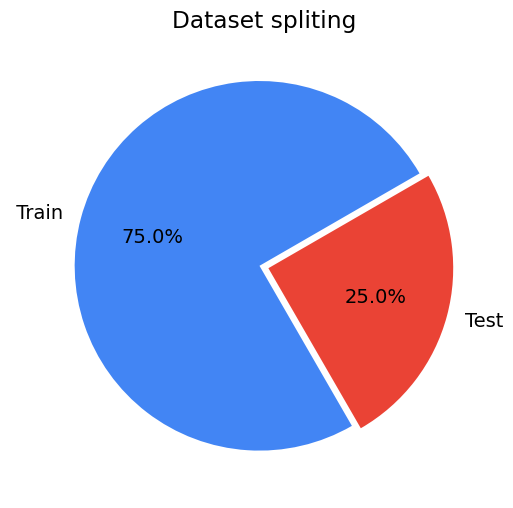

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335']
plt.rcParams.update({'font.size': 14})
plt.pie([len(x_train.value_counts()),
         len(x_test.value_counts())],
        labels=[' Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.025, 0.025),
        startangle=30);
plt.title('Dataset spliting')
plt.show()

### Decision Trees

In [19]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

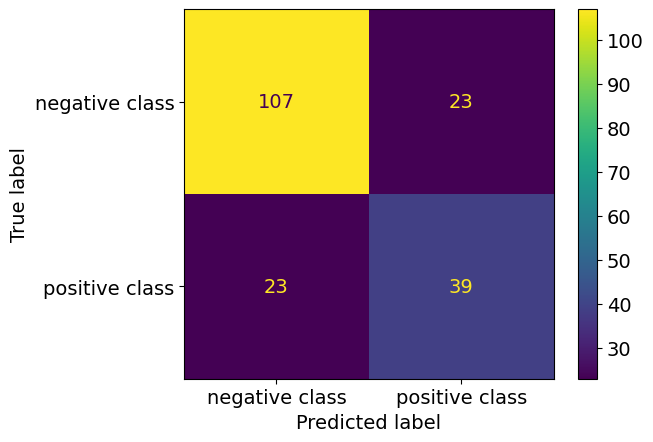

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=['negative class', 'positive class'])

disp.plot()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['negative class', 'positive class']))

                precision    recall  f1-score   support

negative class       0.82      0.82      0.82       130
positive class       0.63      0.63      0.63        62

      accuracy                           0.76       192
     macro avg       0.73      0.73      0.73       192
  weighted avg       0.76      0.76      0.76       192



### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

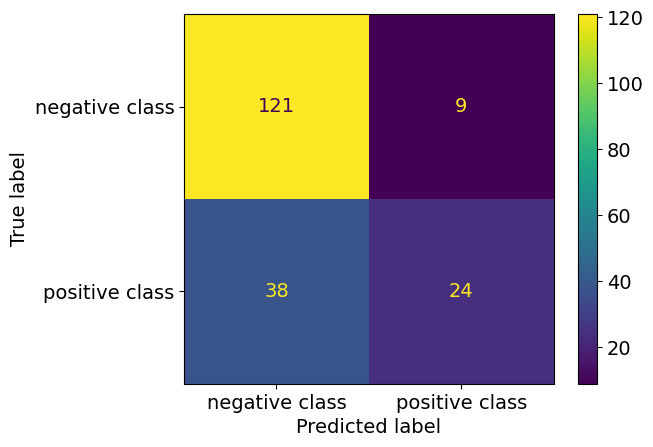

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=['negative class', 'positive class'])

disp.plot()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['negative class', 'positive class']))

                precision    recall  f1-score   support

negative class       0.76      0.93      0.84       130
positive class       0.73      0.39      0.51        62

      accuracy                           0.76       192
     macro avg       0.74      0.66      0.67       192
  weighted avg       0.75      0.76      0.73       192



### Support Vector Machine

In [28]:
from sklearn import svm

sv = svm.SVC()

sv.fit(x_train, y_train)

y_pred = sv.predict(x_test)

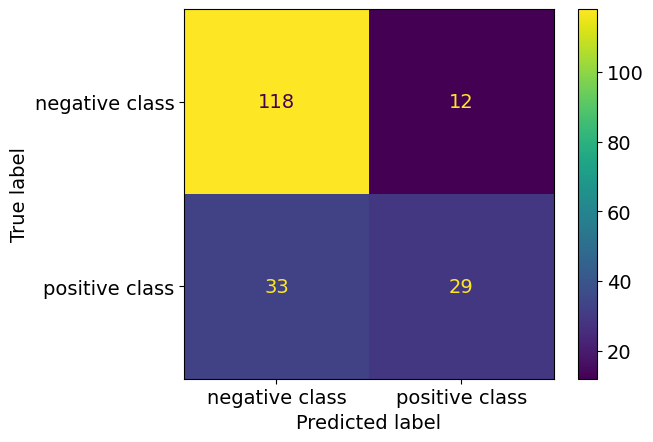

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=['negative class', 'positive class'])

disp.plot()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['negative class', 'positive class']))

                precision    recall  f1-score   support

negative class       0.78      0.91      0.84       130
positive class       0.71      0.47      0.56        62

      accuracy                           0.77       192
     macro avg       0.74      0.69      0.70       192
  weighted avg       0.76      0.77      0.75       192



### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

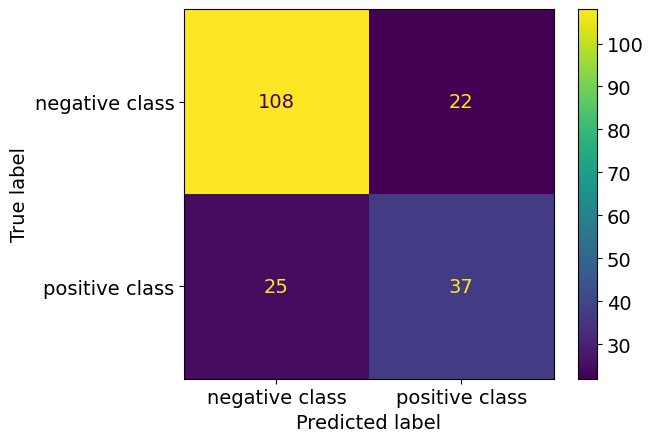

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=['negative class', 'positive class'])

disp.plot()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['negative class', 'positive class']))

                precision    recall  f1-score   support

negative class       0.81      0.83      0.82       130
positive class       0.63      0.60      0.61        62

      accuracy                           0.76       192
     macro avg       0.72      0.71      0.72       192
  weighted avg       0.75      0.76      0.75       192



## Deep Learning

In [66]:
from torch.utils.data import Dataset
import torch
import numpy as np
import random
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision
from torchvision.transforms.functional import InterpolationMode
import torchvision.transforms as T
import torch.nn.functional as F

class Classification(Dataset):
    def __init__(self, X, Y) -> None: #input of dataset
        super(Classification,self).__init__()
        self.X = X
        self.Y = Y

    def __getitem__(self, index) -> dict:
        data = self.X.iloc[index]
        label = self.Y.iloc[index]

        #transform to a torch tensor
        data = torch.tensor(data)
        label = torch.tensor(label)
        if label == 0:
            label = torch.tensor([1,0])
        else:
            label = torch.tensor([0,1])


        return {'data': data.float(),
                'label': label.float()
                }
        
    
    def __len__(self) -> int:
        return len(self.X.value_counts())
    

### Multi-layer perception

In [74]:
import torch
import torch.nn as nn


class Model_MLP(nn.Module):
    def __init__(self) -> None:
        super(Model_MLP, self).__init__()

        '''
        This model is a deep learning model based in multi-layer perceptions.
        The first layer has 13 neurons, which is the number of features. 

        '''

        self.mlp1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(8, 200),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(200, 50),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(50, 2),
            nn.Sigmoid()
        )

    def forward(self, x) -> torch.tensor:
        return self.mlp1(x)

In [75]:
from torch.utils.data import DataLoader

#train DataLoader
train_dataset = Classification(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle= True)


In [109]:
import torch.optim as optim

Net = Model_MLP()
Net = Net.to('cpu') #I do not have a NVIDIA driver

#SGD with an initial learning rate of 0.01 and a momentum of 0.9
optimizer = optim.Adam(Net.parameters(),lr=0.001)

 #loss function Cross Entropy
loss_function = torch.nn.CrossEntropyLoss()

In [110]:
total_params = sum(p.numel() for p in Net.parameters())
print(f"Number of parameters: {total_params}") #number of parameters

Number of parameters: 11952


In [111]:
for ep in range(40):
    Net.train()
    for itter, batch in enumerate(train_loader):
    
        data, label = batch['data'], batch['label']

        pred = Net(data)
               
        loss = loss_function(pred.float(), label.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

/tmp/ipykernel_3618/3566435770.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_3618/3566435770.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_3618/3566435770.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_3618/3566435770.py:26: FutureWarning: Series.__getitem__ treating keys as positions is depr

In [112]:
from torch.utils.data import DataLoader

test_dataset = Classification(x_test,y_test) #DataLoader of test data
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle= False)

In [113]:
with torch.no_grad():
    Net.eval()
    
    y_pred = []
    y_true = []
    
    for itter, batch in enumerate(test_loader):
    
        data, label = batch['data'], batch['label']

        pred = Net(data)
        
        pred = torch.argmax(pred, axis=1)
        label = torch.argmax(label, axis=1)
        
        y_pred.extend(pred.detach().cpu())
        y_true.extend(label.detach().cpu())

/tmp/ipykernel_3618/3566435770.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


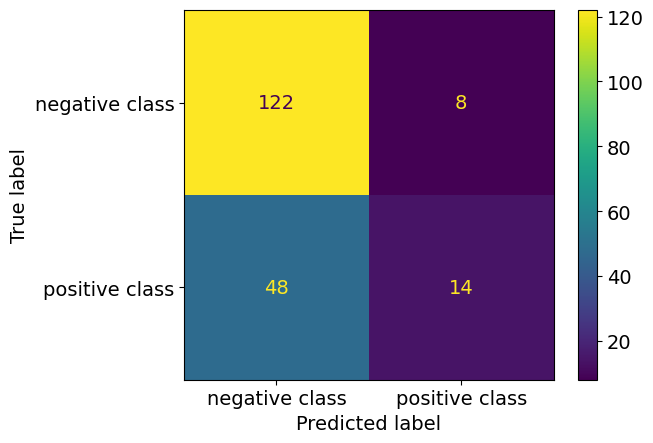

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_true, y_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=['negative class', 'positive class'])

disp.plot()

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['negative class', 'first class']))

                precision    recall  f1-score   support

negative class       0.72      0.94      0.81       130
   first class       0.64      0.23      0.33        62

      accuracy                           0.71       192
     macro avg       0.68      0.58      0.57       192
  weighted avg       0.69      0.71      0.66       192



### Restricted Boltzmann Machines

In [120]:
from sklearn.neural_network import BernoulliRBM
from sklearn import linear_model
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

rbm.learning_rate = 0.001
rbm.n_iter = 10

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(x_train, y_train)

y_pred = rbm_features_classifier.predict(x_test)

/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/s

[BernoulliRBM] Iteration 1, pseudo-likelihood = -211.02, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -424.94, time = 0.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -638.87, time = 0.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -852.79, time = 0.04s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1066.73, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1280.66, time = 0.04s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1494.58, time = 0.04s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1708.51, time = 0.04s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1922.44, time = 0.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2136.37, time = 0.05s


/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  warnings.warn(


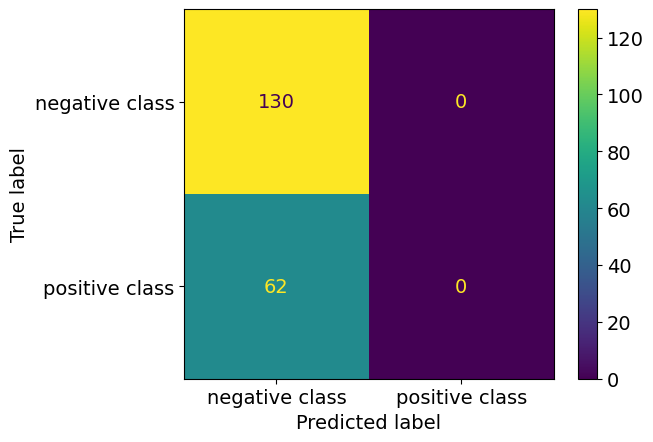

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=['negative class', 'positive class'])

disp.plot()

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['negative class', 'positive class']))

                precision    recall  f1-score   support

negative class       0.68      1.00      0.81       130
positive class       0.00      0.00      0.00        62

      accuracy                           0.68       192
     macro avg       0.34      0.50      0.40       192
  weighted avg       0.46      0.68      0.55       192



/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
